In [2]:
import pandas as pd
import numpy as np

In [3]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0       21          27  13495.0   
1                9.0       111.0    5000.0       21          27  16500.0   
2                9.0       154.0    5000.0       19          26  16500.0   
3               10.0       102.0    5500.0       24          30  13950.0   
4                8.0       115.0    5500.0       18          22  17450.0   

  city-L/100km  horsepower-binned  diesel  gas  
0    11.190476             Medium       0    1  
1    11.190476             Medium       0    1  
2    12.368421             Medium       0    1  
3     9.791667             Medium       0    1  
4    13.055556             Medium       0    1  

[5 rows x 29 columns]

In [4]:
from sklearn.linear_model import LinearRegression

# Simple linear Regression

In [5]:
lm = LinearRegression()

In [6]:
Y = df['price']
X = df[['horsepower']]

In [7]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
# Predicted Values
Yhat = lm.predict(X)

In [9]:
import seaborn as sns

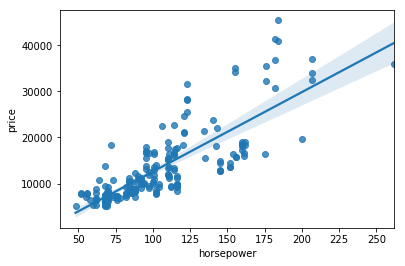

In [10]:
sns.regplot(x='horsepower', y='price', data=df)

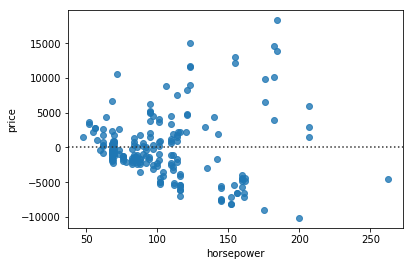

In [11]:
sns.residplot(df['horsepower'], df['price'])

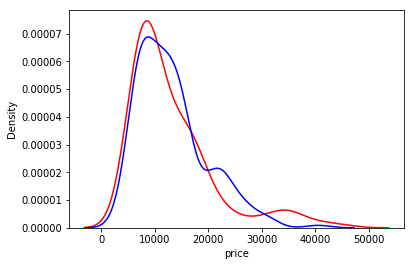

In [12]:
ax1 = sns.distplot(df['price'], hist=False, color = 'r', label="Actual Value")
sns.distplot(Yhat, hist=False, color='b', label="Fitted Values", ax=ax1)

# Multiple Linear Regression

In [13]:
# create model
lm2 = LinearRegression()
# independent variable
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
# fit model
lm2.fit(Z, df['price'])
# print coefficient and intercept
print(lm2.coef_)
print(lm2.intercept_)

[53.49574423  4.70770099 81.53026382 36.05748882]
-15806.62462632922


In [14]:
# Predict model
Yhat = lm2.predict(Z)

# Polynomial Regression

In [15]:
x = df['horsepower']
y = df['price']
f = np.polyfit(x, y, 3)

In [16]:
p = np.poly1d(f)
print(p)

           3         2
-0.004377 x + 2.044 x - 113.3 x + 7211


# Buil a pipeline

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [18]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('mode', LinearRegression())]

In [19]:
pipe = Pipeline(Input)

In [20]:
pipe.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], df['price'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('mode', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [21]:
yhat = pipe.predict(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [22]:
yhat

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385, 10510.56542385, 15845.70697835,
       16068.03816037, 18547.43547305, 25222.41976123, 25176.06409341,
       26518.01037743,  5896.19728097,  6225.67595805,  6265.22601565,
        5976.20889391,  5832.72306295, 10109.23396371,  6061.05969767,
        6118.14411398,  6118.14411398, 10042.92800648, 11301.10641037,
       18336.04622938,  7336.72885437,  6420.49643279,  5174.21296336,
        6619.35236359,  6652.09244229,  6765.45204951,  6795.56233742,
        8796.64497511,  8948.23637645,  8991.91184621,  9194.18038695,
       10928.27635866, 10052.96792101,  9660.68466801, 12124.39546671,
       36318.61803898, 36318.61803898, 41642.8179005 ,  5912.27956733,
        5928.15567673,  5941.11734652,  6046.17348651,  6059.47585172,
       10195.17246527, 10195.17246527, 10183.58560528, 15943.91103394,
      

# R_squared & MSE

In [23]:
r_squared = lm.score(X, Y)

In [24]:
r_squared

0.6554109795391572

In [27]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df['price'], Yhat)

11980366.87072649